In [ ]:
"""
input:
    - fisher_exact_test_results_state.parquet
    - main_configs.json
    - state_based_vaccination_percentage_and_odd_ratios.parquet
output:
    - attitude_map_heatmap.svg
    - people_vaccinated_per_hundered_map_heatmap.svg
"""

In [1]:
import json
import pickle
import pandas as pd
import seaborn as sns

from src.scripts.common_figures import Figures

In [2]:
supp_figures_path = "/figures/experimental/supp_figures"
main_figures_path = "/figures/experimental/main_figures"
dataframes_path = "/data/processed/dataframes"

figures = Figures()

In [ ]:
with open("/src/main_configs.json", 'r') as f:
    main_configs = json.load(f)

with open("data/raw/geopandas_obj.pkl", 'rb') as f:
    states = pickle.load(f)

In [4]:
odd_ratio = pd.read_parquet(f"{dataframes_path}/fisher_exact_test_results_state.parquet")
odd_ratio = odd_ratio[odd_ratio['state'].isin(main_configs['us_51_state'])].reset_index(drop=True)
odd_ratio.head()

,state,tweet_counts,padj,odd_ratios
0,AK,657,5.050392,0.471756
1,AL,3779,1.944947,-0.100419
2,AR,2246,4.482618,-0.208552
3,AZ,8280,21.921547,-0.253782
4,CA,44623,41.272551,0.171503


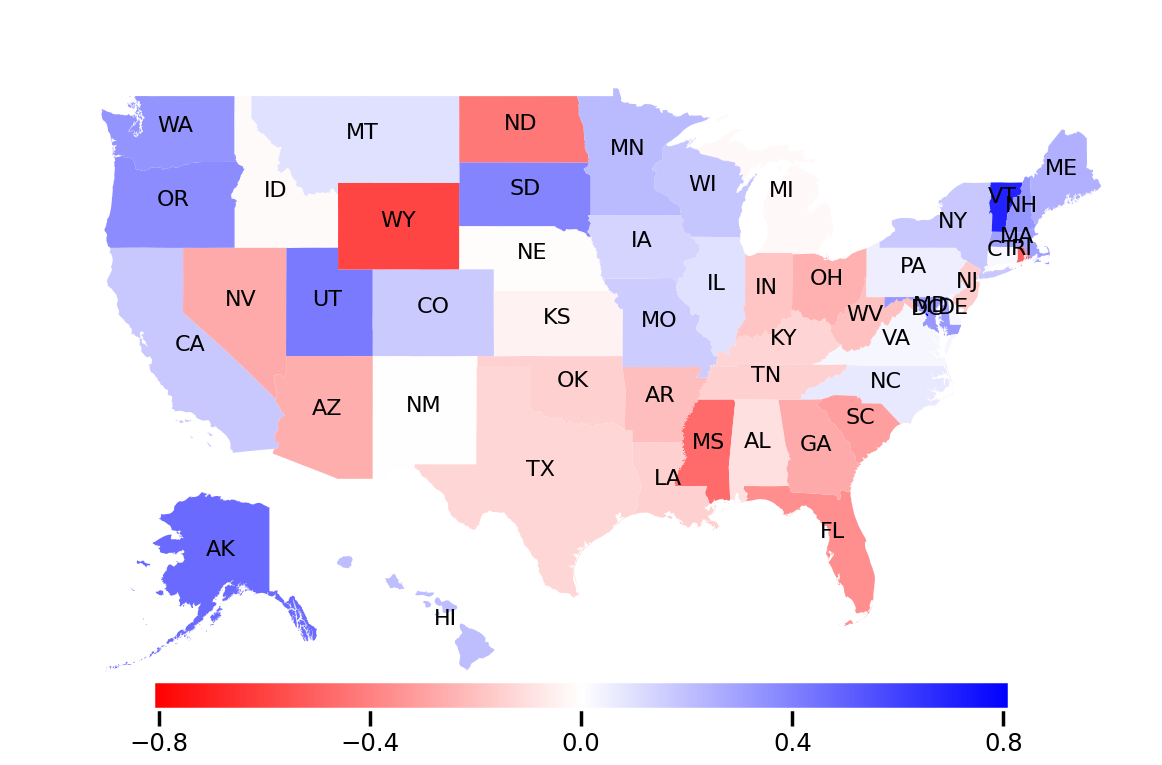

In [11]:
colors = ['red','white', 'blue']
paper_figure = f"{main_figures_path}/attitude_map_heatmap.svg"

sns.set_context('poster', 0.8)
figures.map_heatmap(odd_ratio, states, 'odd_ratios', colors, fontsize=16, figsize=(12, 12),
                    ticks_margin=0.4, ticks_round=1, cmap_orient='horizontal', fraction=0.026,
                      aspect=30, save=None, paper_figure=paper_figure)

In [ ]:
# trimmed_image = figures.trim_white_space(paper_figure)
# trimmed_image.save(paper_figure)

## Vaccination Percentage

In [6]:
state_base_vaccination = pd.read_parquet(f"{dataframes_path}/state_based_vaccination_percentage_and_odd_ratios.parquet")

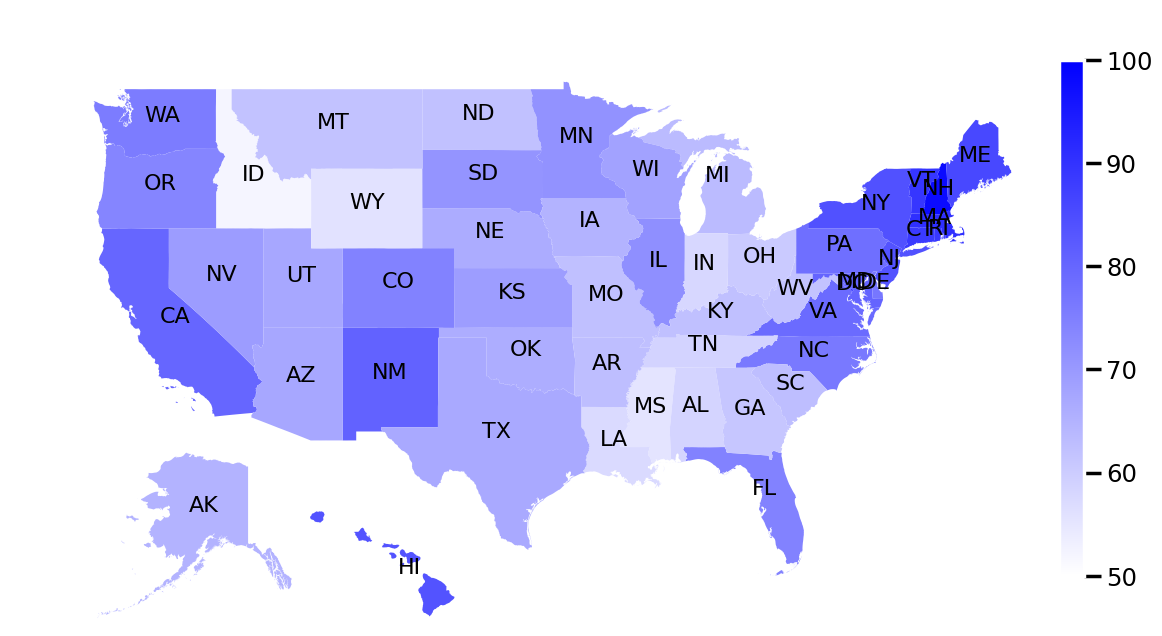

In [10]:
colors = ['white', 'blue']
save = f"{supp_figures_path}/people_vaccinated_per_hundered_map_heatmap.svg"

sns.set_context('poster', 0.8)
figures.map_heatmap(state_base_vaccination, states, 'people_vaccinated_per_hundred', colors,
                    fontsize=16, figsize=(12, 12), min_max=[50, 100], ticks_margin=None, ticks_round=1,
                    save=None, paper_figure=save)

In [ ]:
# trimmed_image = figures.trim_white_space(save)
# trimmed_image.save(save)